In [1]:
import mysql.connector

In [2]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [3]:
import pandas as pd

In [4]:
interest_rate_addr = "../data/금, 은 가격.xlsx"
df = pd.read_excel(interest_rate_addr, header=6, usecols="A,B")
df.rename(columns={df.columns[0]:"date",
                   df.columns[1]:"gold_price"},
                   inplace=True)
df.set_index(df.columns[0], inplace=True)
df.head()

,gold_price
date,
1990-01,409.819061
1990-02,417.181061
1990-03,392.703339
1990-04,374.292114
1990-05,369.197632


In [5]:
# df.loc["20190901":]
corona_interval = df["2004-08":]
corona_interval.head()

,gold_price
date,
2004-08,400.509524
2004-09,405.275000
2004-10,420.464286
2004-11,439.375000
2004-12,442.078947


In [6]:
import numpy as np

In [7]:
month_init1 = corona_interval.index[0]
before_price = round(corona_interval.loc[month_init1])

month_init2 = corona_interval.index[1]
after_price = round(corona_interval.loc[month_init2])
print(before_price, after_price)

gold_price    401.0
Name: 2004-08, dtype: float64 gold_price    405.0
Name: 2004-09, dtype: float64


In [8]:
monthly = []
month = month_init1[:]

past_price = round(before_price['gold_price'], 1)
now_price = round(after_price['gold_price'], 1)
rate_of_change = round((now_price - past_price) / past_price * 100, 2)

count = 0
sum = 0.
mean = 0.
for index, row in corona_interval.iterrows():
    # print(index, row["k_interest_rate"], row["usa_interest_rate"])
    count = count + 1

    # print(now_month)
    sum = sum + float(row["gold_price"])
    
    now_month = index[:]
    month_info = []

    if month != now_month:
        mean = round(sum / count, 1)

        past_price = now_price
        now_price = mean
        rate_of_change = round((now_price - past_price) / past_price * 100, 2)

        month_info.append(now_month + str("-01"))
        month_info.append(now_price)
        month_info.append(rate_of_change)

        monthly.append(month_info)

        month = now_month
        count = 0
        sum = 0.

monthly

[['2004-09-01', 402.9, np.float64(-0.52)],
 ['2004-10-01', 420.5, 4.37],
 ['2004-11-01', 439.4, 4.49],
 ['2004-12-01', 442.1, 0.61],
 ['2005-01-01', 424.0, -4.09],
 ['2005-02-01', 423.4, -0.14],
 ['2005-03-01', 434.3, 2.57],
 ['2005-04-01', 429.2, -1.17],
 ['2005-05-01', 421.9, -1.7],
 ['2005-06-01', 430.7, 2.09],
 ['2005-07-01', 424.5, -1.44],
 ['2005-08-01', 437.9, 3.16],
 ['2005-09-01', 456.0, 4.13],
 ['2005-10-01', 469.9, 3.05],
 ['2005-11-01', 476.7, 1.45],
 ['2005-12-01', 510.1, 7.01],
 ['2006-01-01', 549.9, 7.8],
 ['2006-02-01', 555.0, 0.93],
 ['2006-03-01', 557.1, 0.38],
 ['2006-04-01', 610.7, 9.62],
 ['2006-05-01', 675.4, 10.59],
 ['2006-06-01', 596.1, -11.74],
 ['2006-07-01', 633.7, 6.31],
 ['2006-08-01', 632.6, -0.17],
 ['2006-09-01', 598.2, -5.44],
 ['2006-10-01', 585.8, -2.07],
 ['2006-11-01', 627.8, 7.17],
 ['2006-12-01', 629.8, 0.32],
 ['2007-01-01', 631.2, 0.22],
 ['2007-02-01', 664.7, 5.31],
 ['2007-03-01', 654.9, -1.47],
 ['2007-04-01', 679.4, 3.74],
 ['2007-05-01', 6

In [9]:
monthly_df = pd.DataFrame(monthly, columns=["date", "gold_price", "rate_of_change"])
monthly_df.set_index("date", inplace=True)
monthly_df.tail()

,gold_price,rate_of_change
date,,
2024-04-01,2333.6,7.92
2024-05-01,2350.6,0.73
2024-06-01,2328.3,-0.95
2024-07-01,2394.0,2.82
2024-08-01,2468.3,3.10


In [10]:
monthly_df.head()

,gold_price,rate_of_change
date,,
2004-09-01,402.9,-0.52
2004-10-01,420.5,4.37
2004-11-01,439.4,4.49
2004-12-01,442.1,0.61
2005-01-01,424.0,-4.09


In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
from matplotlib import dates
import matplotlib.dates as mdates
import datetime

In [12]:
temp = list(monthly_df.index)
len(temp)
np.arange(0, len(temp), 12)

array([  0,  12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144,
       156, 168, 180, 192, 204, 216, 228])

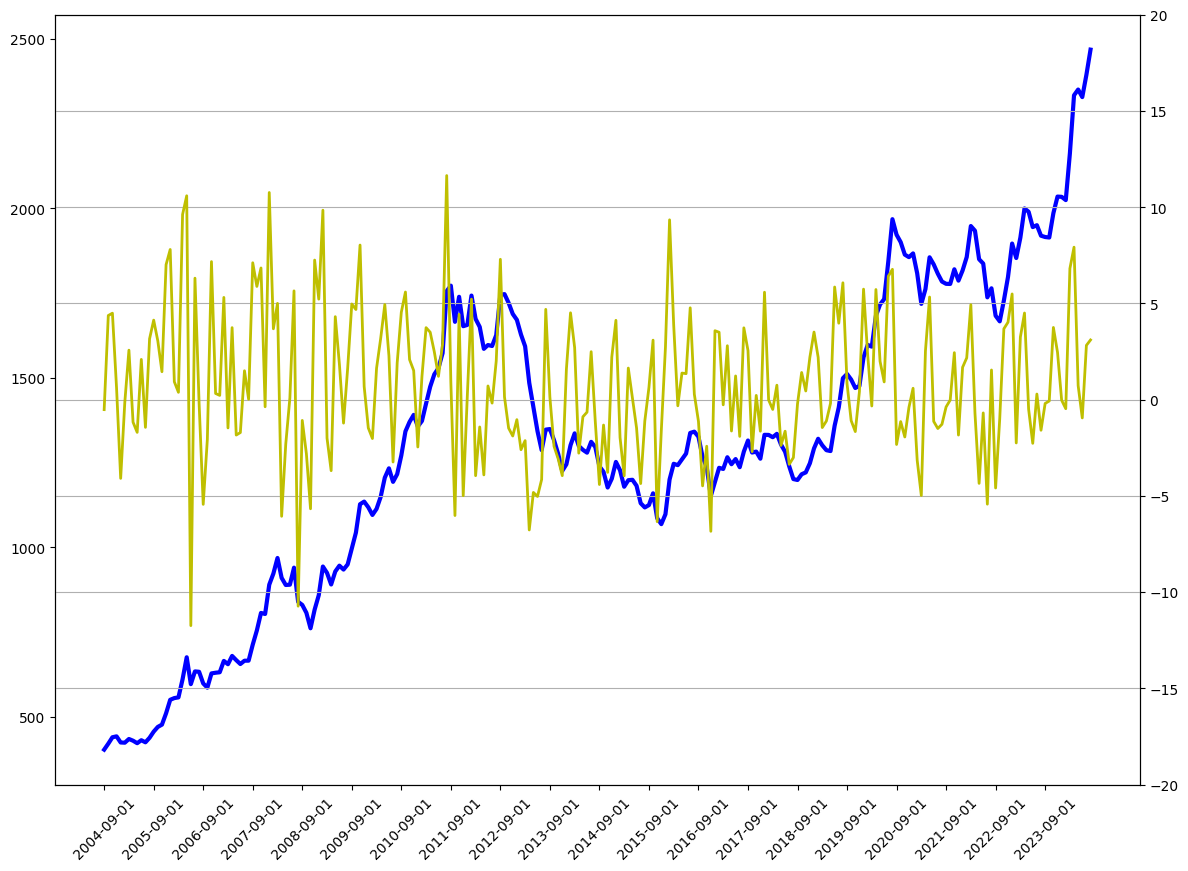

In [18]:
fig = plt.figure(figsize=(14,10))
fig.set_facecolor('white')
ax1 = fig.add_subplot()
plt.xticks(np.arange(0, len(temp), 12), rotation=45)

color1 = 'b'
ax1.plot(monthly_df.index, monthly_df["gold_price"], color=color1, linewidth=3)
# ax1.set_xticklabels(ro)
# ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'y'
ax2 = ax1.twinx()
ax2.plot(monthly_df.index, monthly_df["rate_of_change"], color=color2, linewidth=2)
ax2.set_ylim(-20, 20)
# ax2.tick_params(axis='y', labelcolor=color2)

plt.grid()
plt.show()

In [14]:
import mysql.connector

In [15]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [16]:
# cur = remote.cursor()

# cur.execute("""create table stock_index (
#         date date, 
#         stock_index float)""")

In [17]:
cur = remote.cursor()

sql = open("../sql_script/insert_gold.sql").read()
for index, row in monthly_df.iterrows():
    temp = [index, row["gold_price"], row["rate_of_change"]]
    print(temp)
    cur.execute(sql, tuple(temp))
    remote.commit()

cur.execute("select * from gold")
result = cur.fetchall()
for row in result:
    print(row)

['2004-09-01', np.float64(402.9), np.float64(-0.52)]
['2004-10-01', np.float64(420.5), np.float64(4.37)]
['2004-11-01', np.float64(439.4), np.float64(4.49)]
['2004-12-01', np.float64(442.1), np.float64(0.61)]
['2005-01-01', np.float64(424.0), np.float64(-4.09)]
['2005-02-01', np.float64(423.4), np.float64(-0.14)]
['2005-03-01', np.float64(434.3), np.float64(2.57)]
['2005-04-01', np.float64(429.2), np.float64(-1.17)]
['2005-05-01', np.float64(421.9), np.float64(-1.7)]
['2005-06-01', np.float64(430.7), np.float64(2.09)]
['2005-07-01', np.float64(424.5), np.float64(-1.44)]
['2005-08-01', np.float64(437.9), np.float64(3.16)]
['2005-09-01', np.float64(456.0), np.float64(4.13)]
['2005-10-01', np.float64(469.9), np.float64(3.05)]
['2005-11-01', np.float64(476.7), np.float64(1.45)]
['2005-12-01', np.float64(510.1), np.float64(7.01)]
['2006-01-01', np.float64(549.9), np.float64(7.8)]
['2006-02-01', np.float64(555.0), np.float64(0.93)]
['2006-03-01', np.float64(557.1), np.float64(0.38)]
['2006-0

In [18]:
remote.close()